Uploading  Data Set

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error,r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
car=pd.read_csv("cardata.csv")
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Showing  All Coumn Names at one place

In [3]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
len(car)

205

using describe

In [5]:
car.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
car.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
car.groupby(['make']).size()

make
alfa-romero       3
audi              7
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             4
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan           18
peugot           11
plymouth          7
porsche           5
renault           2
saab              6
subaru           12
toyota           32
volkswagen       12
volvo            11
dtype: int64

Data Cleaning

In [8]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
CompanyName = car['make'].apply(lambda x : x.split(' ')[0])
car.insert(3,"CompanyName",CompanyName)
car.drop(['make'],axis=1,inplace=True)
car.head()

,symboling,normalized-losses,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [10]:
print(car['CompanyName'].unique())
print(car['fuel-type'].unique())
print(car['num-of-doors'].unique())
print(car['aspiration'].unique())
print(car['body-style'].unique())
print(car['drive-wheels'].unique())
print(car['engine-location'].unique())
print(car['fuel-system'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['two' 'four' '?']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [11]:
car["normalized-losses"].replace("?","0",inplace=True)
car["horsepower"].replace("?","0",inplace=True)
car["peak-rpm"].replace("?","0",inplace=True)
car["bore"].replace("?","0",inplace=True)
car["stroke"].replace("?","0",inplace=True)
car["price"].replace("?","0",inplace=True)
car.head()

,symboling,normalized-losses,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
car.isnull().sum()

symboling            0
normalized-losses    0
CompanyName          0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
new_car=car[['CompanyName','length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size',  'bore', 'stroke',
     'horsepower', 'city-mpg',  'highway-mpg', 'price']]
new_car.head()

,CompanyName,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,168.8,64.1,48.8,2548,four,130,3.47,2.68,111,21,27,13495
1,alfa-romero,168.8,64.1,48.8,2548,four,130,3.47,2.68,111,21,27,16500
2,alfa-romero,171.2,65.5,52.4,2823,six,152,2.68,3.47,154,19,26,16500
3,audi,176.6,66.2,54.3,2337,four,109,3.19,3.4,102,24,30,13950
4,audi,176.6,66.4,54.3,2824,five,136,3.19,3.4,115,18,22,17450


<Figure size 720x720 with 0 Axes>

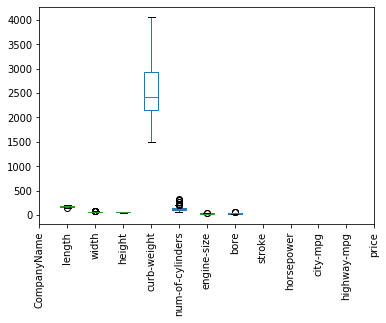

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10,10))
new_car.plot.box()
plt.xticks(list(range(len(new_car.columns))),new_car.columns,rotation='vertical')
plt.show()
plt.tight_layout()

In [15]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df




new_car = dummies('num-of-cylinders',car)
new_car = dummies('CompanyName',car)

new_car.head()


,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,0,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,0,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,0,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Density or Relative Frequency Of Cars By Price')

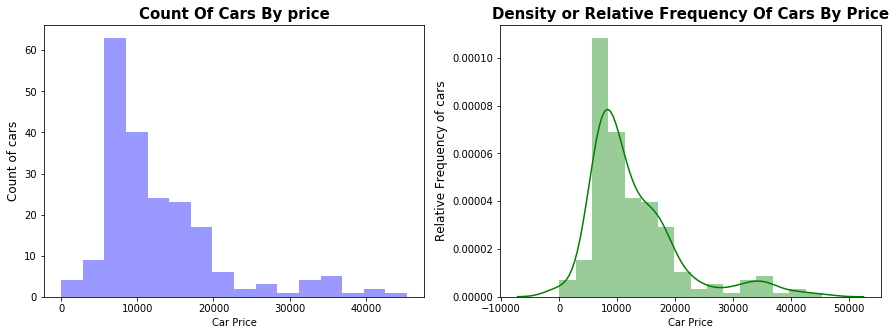

In [16]:
import seaborn as sns

fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(new_car['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By price',size=15,weight="bold")

sns.distplot(new_car['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")

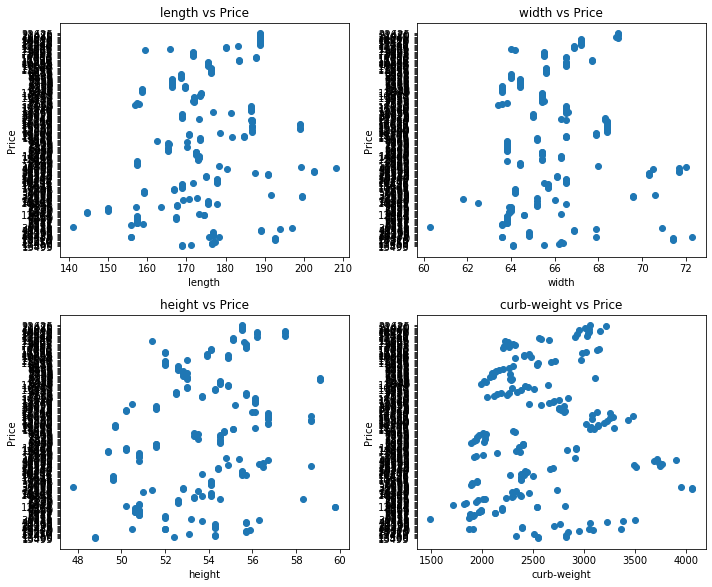

In [17]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(new_car[x],new_car['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('length', 1)
scatter('width', 2)
scatter('height', 3)
scatter('curb-weight', 4)

plt.tight_layout()

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaling=MinMaxScaler()

In [20]:
scaling.fit_transform(new_car[["wheel-base","length"]])

array([[0.05830904, 0.41343284],
       [0.05830904, 0.41343284],
       [0.2303207 , 0.44925373],
       [0.38483965, 0.52985075],
       [0.37317784, 0.52985075],
       [0.38483965, 0.54029851],
       [0.55976676, 0.77014925],
       [0.55976676, 0.77014925],
       [0.55976676, 0.77014925],
       [0.37609329, 0.55373134],
       [0.42565598, 0.53283582],
       [0.42565598, 0.53283582],
       [0.42565598, 0.53283582],
       [0.42565598, 0.53283582],
       [0.49271137, 0.71492537],
       [0.49271137, 0.71492537],
       [0.49271137, 0.78656716],
       [0.68221574, 0.83432836],
       [0.05247813, 0.        ],
       [0.2303207 , 0.22089552],
       [0.2303207 , 0.2641791 ],
       [0.20699708, 0.24179104],
       [0.20699708, 0.24179104],
       [0.20699708, 0.24179104],
       [0.20699708, 0.24179104],
       [0.20699708, 0.24179104],
       [0.20699708, 0.24179104],
       [0.20699708, 0.24179104],
       [0.48688047, 0.5       ],
       [0.27113703, 0.47910448],
       [0.

In [21]:
train_data=new_car[["wheel-base","length","width","height","curb-weight","engine-size","bore","stroke","horsepower","city-mpg","highway-mpg","price"]]
train_data.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,27,13495
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,27,16500
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,19,26,16500
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,102,24,30,13950
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,115,18,22,17450


In [22]:
test_data=new_car[["wheel-base","length","width","height","curb-weight","engine-size","bore","stroke","horsepower","city-mpg","highway-mpg",]]
test_data.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,city-mpg,highway-mpg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,102,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,115,18,22


In [23]:
train_data.describe()

,wheel-base,length,width,height,curb-weight,engine-size,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,25.219512,30.751220
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,6.542142,6.886443
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,13.000000,16.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,19.000000,25.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,24.000000,30.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,30.000000,34.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,49.000000,54.000000


In [24]:
def value_counts():
    null=train_data.isnull().sum()
    
    return null

In [25]:
value_counts()

wheel-base     0
length         0
width          0
height         0
curb-weight    0
engine-size    0
bore           0
stroke         0
horsepower     0
city-mpg       0
highway-mpg    0
price          0
dtype: int64

In [56]:
def Preprocess():
    global combined
    train = train_data
    test = test_data
    targets = train.price
    combined = train.append(test)
    return combined

In [57]:
Preprocess()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,27,13495
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,27,16500
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,19,26,16500
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,102,24,30,13950
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,114,23,28,NaN
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,160,19,25,NaN
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,134,18,23,NaN
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.4,106,26,27,NaN


In [58]:
def recover_train_test_target():
    global combined, train_data
    df=train_data
    x=df.drop('price', axis=1)
    y=df['price']
    
    New_data = combined.iloc[205:]
    return x, New_data, y

In [59]:
x, New_data, y = recover_train_test_target()
x.shape,y.shape,New_data

((205, 11),
 (205,),
      wheel-base  length  width  height  curb-weight  engine-size  bore stroke  \
 0          88.6   168.8   64.1    48.8         2548          130  3.47   2.68   
 1          88.6   168.8   64.1    48.8         2548          130  3.47   2.68   
 2          94.5   171.2   65.5    52.4         2823          152  2.68   3.47   
 3          99.8   176.6   66.2    54.3         2337          109  3.19    3.4   
 4          99.4   176.6   66.4    54.3         2824          136  3.19    3.4   
 ..          ...     ...    ...     ...          ...          ...   ...    ...   
 200       109.1   188.8   68.9    55.5         2952          141  3.78   3.15   
 201       109.1   188.8   68.8    55.5         3049          141  3.78   3.15   
 202       109.1   188.8   68.9    55.5         3012          173  3.58   2.87   
 203       109.1   188.8   68.9    55.5         3217          145  3.01    3.4   
 204       109.1   188.8   68.9    55.5         3062          141  3.78   3.1

In [60]:
Preprocess().isnull().sum()

wheel-base       0
length           0
width            0
height           0
curb-weight      0
engine-size      0
bore             0
stroke           0
horsepower       0
city-mpg         0
highway-mpg      0
price          205
dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

In [62]:
x_train.shape

(164, 11)

In [77]:
x_test.shape

(41, 11)

In [78]:
def RFR():
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    global New_data,data_test
    global x_train,x_test,y_train,y_test
    global new_x_train,new_x_test,new_data,selector
    clf = RandomForestRegressor(random_state=25)
    clf = clf.fit(x_train, y_train)
    a=x_train
    features = pd.DataFrame()
    features['Feature'] = a.columns
    features['Importance'] = clf.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)

    train_reduced = x_train[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg']]
    new_x_train=pd.DataFrame(train_reduced)
    test_reduced = x_test[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg']]
    new_x_test=pd.DataFrame(test_reduced)
    new_reduced=New_data[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg']]
    new_data=pd.DataFrame(new_reduced)
    rf = RandomForestRegressor()
    rf.fit(new_x_train, y_train)
    pred=rf.predict(new_x_train)   
    score= explained_variance_score(y_train, pred)
    output = rf.predict(new_data)
    df_output = pd.DataFrame()
    df_output[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg']] = test_data[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg']]

    df_output['PRICE'] = output

    df_output[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg','PRICE']].to_csv('Boston_Housing_submission@RF.csv',index=False)
    
    print('Top 5 important features:\n\n',features[:5])
    print("\nAccuracy Score for first target:\n\n",str(np.round(score*100,4))+' %')
    print("\nPredicted Values of input data:\n\n",pred)
   
    
    print("\nPredicted values on the New Data:\n\n",df_output)
    


In [79]:
RFR()

Top 5 important features:

         Feature  Importance
5   engine-size    0.469962
4   curb-weight    0.261938
1        length    0.052080
10  highway-mpg    0.049984
0    wheel-base    0.036811

Accuracy Score for first target:

 96.7025 %

Predicted Values of input data:

 [ 7532.12        7947.02        9538.54       15549.9
  6189.41166667 10590.315       5601.23333333 29738.66
  6890.19       10080.35       16790.74        6739.46
  8799.          7941.45       32465.95        5942.49583333
 39608.36        5276.71166667 12561.41        7362.64
  8139.8        16720.65       19395.59       32465.95
  7193.19       12960.86       10593.14833333 21805.69
 21505.08        9504.26        6212.22       17919.91
  9253.29        7121.84        8439.07        8163.81
 14032.155      13073.71666667 17205.41       10865.6
 13008.26        7582.4         4414.62666667  9366.77
  7670.07       14158.14        8941.5        10741.01333333
  7298.97        9327.51       18090.12       16490.2

In [90]:
def DTR():
    global New_data,data_test
    global x_train,x_test,y_train,y_test
    global new_x_train,new_x_test,new_data,selector
    


    rf = DecisionTreeRegressor()
    rf.fit(new_x_train, y_train)
    pred=rf.predict(new_x_test)   
   
    score=r2_score(y_test, pred)
    output = rf.predict(new_data)
    df_output = pd.DataFrame()
    df_output[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg']] = test_data[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg']]

    df_output['PRICE'] = output

    df_output[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg','PRICE']].to_csv('Boston_Housing_submission@DTR.csv',index=False)
    
    print("\nAccuracy Score for  target:\n\n",str(np.round(score*100,4))+' %')
    print("\nPredicted Values of input data:\n\n",pred)
   
    
    print("\nPredicted values on the New Data:\n\n",df_output)

In [91]:
DTR()


Accuracy Score for  target:

 34.4746 %

Predicted Values of input data:

 [ 6692.  7775. 11595.  6989. 25552. 12440. 13645. 11259. 15040. 12964.
 10595.  9988.  6989.  7799.  8845.  6692. 17950. 33278.  6229. 17950.
  6338.  6938. 11549.  6938. 16925. 18150. 15750. 14399. 18920.  7799.
     0. 14489. 11595. 11259.  5499.  7299. 25552. 13860.  8249. 12940.
 17199.]

Predicted values on the New Data:

      wheel-base  length  width  height  curb-weight  engine-size  bore stroke  \
0          88.6   168.8   64.1    48.8         2548          130  3.47   2.68   
1          88.6   168.8   64.1    48.8         2548          130  3.47   2.68   
2          94.5   171.2   65.5    52.4         2823          152  2.68   3.47   
3          99.8   176.6   66.2    54.3         2337          109  3.19    3.4   
4          99.4   176.6   66.4    54.3         2824          136  3.19    3.4   
..          ...     ...    ...     ...          ...          ...   ...    ...   
200       109.1   188.8   6

In [92]:
def RR():
    global New_data,data_test
    global x_train,x_test,y_train,y_test
    global new_x_train,new_x_test,new_data,selector
    


    rf = Ridge()
    rf.fit(new_x_train, y_train)
    pred=rf.predict(new_x_train)   
    score= explained_variance_score(y_train, pred)
    output = rf.predict(new_data)
    df_output = pd.DataFrame()
    df_output[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg']] = test_data[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg']]

    df_output['PRICE'] = output

    df_output[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','horsepower','city-mpg','highway-mpg','PRICE']].to_csv('Boston_Housing_submission@RR.csv',index=False)
    
    
    print("\nAccuracy Score for  target:\n\n",str(np.round(score*100,4))+' %')
    print("\nPredicted Values of input data:\n\n",pred)
   
    
    print("\nPredicted values on the New Data:\n\n",df_output)

In [93]:
RR()


Accuracy Score for  target:

 78.1633 %

Predicted Values of input data:

 [ 9340.51243343  7075.66742818 13821.04058817 14864.97893165
  2923.47259815 14826.01586834  5087.14495616 23905.32372359
  4975.69128346  8130.15141205 24070.11921897  5853.8851715
  8849.12210508  6128.04398294 22570.39456847  2772.39496723
 45737.25897727  3004.6131061  14937.98202181  9454.31118272
  8364.64288274 20494.91711112 14845.0214047  22570.39456847
  7541.20882072 15458.04840709 11688.65471753 15251.88521672
 21939.19035662 13801.886734    4517.1870184  15005.2931774
  8267.62096585  6537.95617455  9642.86719175  9599.59192998
 15404.12109631 13528.18411852 13961.98944284 11484.65542493
 13302.67924311 10532.77508584  5479.01867642 11194.71922024
  9353.85375901 17193.21373607 10424.34049573 12047.9362138
  8903.37540761  9061.76606124 15639.88824003 15404.65420272
  5577.35768546  4467.83695328  9509.19329112 11209.83121641
  8521.85709076  6128.04398294 27760.19966879 12869.95564098
 30076.07831

In [ ]:
def LR():
    global New_data,data_test
    global x_train,x_test,y_train,y_test
    global new_x_train,new_x_test,new_data,selector
    


    rf =LinearRegression()
    rf.fit(new_x_train, y_train)
    pred=rf.predict(new_x_train)   
    score= explained_variance_score(y_train, pred)
    #mae = mean_absolute_error(pred, y_test)
    output = rf.predict(new_data)
    df_output = pd.DataFrame()
    df_output[['RM','LSTAT','CRIM','DIS','TAX']] = data_test[['RM','LSTAT','CRIM','DIS','TAX']]

    df_output['PRICE'] = output

    df_output[['RM','LSTAT','CRIM','DIS','TAX','PRICE']].to_csv('Boston_Housing_submission@LR.csv',index=False)
    
    print("\nAccuracy Score for  target:\n\n",str(np.round(score*100,4))+' %')
    print("\nPredicted Values of input data:\n\n",pred)
   
    
    print("\nPredicted values on the New Data:\n\n",df_output)